In [1]:
import re # text extration regex
import pandas as pd # data manipulation and analysis
import numpy as np
import matplotlib as plt # general visualisation
import geonamescache as gc # identify cities and countries and their location
#from matplotlib import basemap # geographical visualisation
from collections import Counter # check duplicates in dictionary
import unidecode # handling accent marks, editing text
import json # saving data

In [2]:
# import df
df = pd.read_json('headline_cities_and_countries.json')
df = df.replace({None: np.nan})
df.head()

,Headline,Countries,Cities
0,Zika Outbreak Hits Miami,NaN,Miami
1,Could Zika Reach New York City?,NaN,New York City
2,First Case of Zika in Miami Beach,NaN,Miami Beach
3,"Mystery Virus Spreads in Recife, Brazil",Brazil,Recife
4,Dallas man comes down with case of Zika,NaN,Dallas


In [3]:
df.describe()

,Headline,Countries,Cities
count,650,15,606
unique,647,10,573
top,Barcelona Struck by Spanish Flu,Malaysia,Monroe
freq,2,3,4


In [5]:
# check duplicate headlines
df['Headline'].value_counts().sort_values().tail()

# drop duplicates
df = df.drop_duplicates()
df.describe()

,Headline,Countries,Cities
count,647,15,603
unique,647,10,573
top,Swine Flu re-emerges in La Jolla,Malaysia,Monroe
freq,1,3,4


In [6]:
# visualise data
df['Countries'].value_counts()

Malaysia     3
Brazil       3
Panama       2
Mexico       1
Hong Kong    1
Guatemala    1
Singapore    1
Thailand     1
Vietnam      1
Belize       1
Name: Countries, dtype: int64

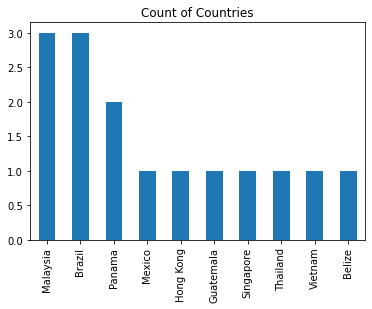

In [8]:
%matplotlib inline

_ = df['Countries'].value_counts().plot.bar(title='Count of Countries')

In [9]:
# too many cities to use bar 
df['Cities'].nunique()

573

In [10]:
# 10 most common cities
df['Cities'].value_counts().sort_values().tail(10)

Norwalk      2
Edinburgh    2
Richmond     2
Barcelona    2
Zanzibar     2
Cambridge    2
Hollywood    2
Madrid       3
Miami        4
Monroe       4
Name: Cities, dtype: int64

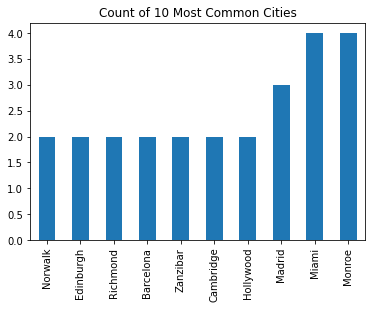

In [11]:
_ = df['Cities'].value_counts().sort_values().tail(10).plot.bar(title='Count of 10 Most Common Cities')

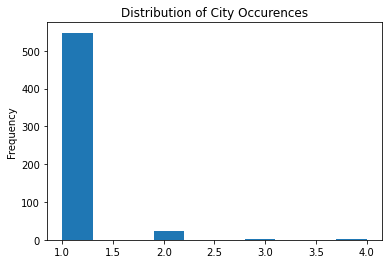

In [12]:
# most cities only occur once
_ = df['Cities'].value_counts().plot.hist(title='Distribution of City Occurences')

In [15]:
# ADD LATITUDE AND LONGITUDE FOR EACH CITY

# import city accented mapping
with open('city_accent_mapping.json', 'r') as fin:
    city_accent_mapping = json.loads(fin.read())

# add to df by mapping to city names col
df['Accented_cities'] = df['Cities'].map(city_accent_mapping)

# show cases where accented and unaccentd are different
df[df['Cities'] != df['Accented_cities']].head(5)

,Headline,Countries,Cities,Accented_cities
7,Geneve Scientists Battle to Find Cure,NaN,Geneve,Genève
9,Zika Infested Monkeys in Sao Paulo,NaN,Sao Paulo,São Paulo
17,Louisiana Zika cases up to 26,NaN,NaN,NaN
19,Zika infects pregnant woman in Cebu,NaN,NaN,NaN
47,18 new Zika Cases in Bogota,NaN,Bogota,Bogotá


In [19]:
# when using get_cities_by_name() we need to use original accented name
print(gc.GeonamesCache().get_cities_by_name('Geneve'))
print(gc.GeonamesCache().get_cities_by_name('Genève'))

[]
[{'2660646': {'geonameid': 2660646, 'name': 'Genève', 'latitude': 46.20222, 'longitude': 6.14569, 'countrycode': 'CH', 'population': 183981, 'timezone': 'Europe/Zurich', 'admin1code': 'GE', 'alternatenames': ['Cenevre', 'GVA', 'Genava', 'Genebe', 'Genebra', 'Geneue', 'Geneva', 'Geneve', 'Genevi', 'Genevo', 'Genevra', 'Genewa', 'Genf', 'Genève', 'Ginebra', 'Ginevra', 'Jenewa', 'Jenwe', 'Xenebra', 'Zeneva', 'Zhehneva', 'Zheneva', 'Znev', 'jeneba', 'jineva', 'jnyf', 'jnywa', 'junevu', 'ri nei wa', 'zheneva', 'znbh', 'Ĝenevo', 'Ženeva', 'Ženēva', 'Γενέβη', 'Γενευη', 'Γενεύη', 'Женева', 'Жэнева', 'Ժնև', 'זנבה', 'جنيف', 'جنیوا', 'जिनेवा', 'ჟენევა', 'ジュネーヴ', '日内瓦', '제네바']}}]


In [30]:
# CHOOSE MOST POPULOUS CITY FROM RETURNED LIST OF CITIES
test_city = 'Boston'
matches = gc.GeonamesCache().get_cities_by_name(test_city)

# pull the nested dictionaries out, i.e. get rid of the IDs for each city 
matches = [{key: value for key, value in list(match.values())[0].items()} for match in matches]

# run sorting algorithm with the key as population number
# reverse so that highest population is on top
matches = sorted(matches, key=lambda x: x['population'], reverse=True)
matches

[{'geonameid': 4930956,
  'name': 'Boston',
  'latitude': 42.35843,
  'longitude': -71.05977,
  'countrycode': 'US',
  'population': 667137,
  'timezone': 'America/New_York',
  'admin1code': 'MA',
  'alternatenames': ['BOS',
   'Baston',
   'Bostan',
   'Boston',
   'Bostona',
   'Bostonas',
   'Bostone',
   'Bostonia',
   'Bostono',
   'Bostons',
   'Bostun',
   'Bostún',
   'Mushauwomuk',
   'Old Boston',
   'Po-su-tun',
   'Pokekona',
   'Pô-sṳ-tun',
   'Shawmut',
   'Shawmutt',
   'Shawnnut',
   'Totant',
   'Tramount',
   'Tremont',
   'Trimountain',
   'Trimountaine',
   'Vostoni',
   'Wahstoronon:ke',
   'Wahstoronòn:ke',
   'Wastok',
   'bastan',
   'bastana',
   'bausatana',
   'beasrraൺ',
   'bo shi dun',
   'boseuteon',
   'bostan',
   'bostana',
   'bostʼoni',
   'bosuton',
   'bwstn',
   'bwstwn',
   'bxstan',
   'pastan',
   'Βοστωνη',
   'Βοστώνη',
   'Бостан',
   'Бостон',
   'Бостън',
   'Բոստոն',
   'באסטאן',
   'בוסטון',
   'بوستون',
   'بوسطن',
   'بوسٹن',
   'بۆستن

In [32]:
# FIND CITY LOCATIONS

city_locations = []

# iterate through accented cities
for city in df['Accented_cities']:
    # check against matches
    matches = gc.GeonamesCache().get_cities_by_name(city)
    
    # if there is match, get rid of outer nested dict and sort
    if matches:
        # convert each dict to list then grab all items
        matches = [{key: value for key, value in list(match.values())[0].items()} for match in matches]
        matches = sorted(matches, key= lambda x: x['population'], reverse=True)

        # set the match as the first in list which has been sorted
        match = matches[0]

        # record information as dictionary
        city_locations.append(
            {
                'name': match['name'],
                'latitude': match['latitude'],
                'longitude': match['longitude'],
                'countrycode': match['countrycode'],
                'population': match['population'],
            }
        )


In [33]:
# check
city_locations[:5]

[{'name': 'Miami',
  'latitude': 25.77427,
  'longitude': -80.19366,
  'countrycode': 'US',
  'population': 441003},
 {'name': 'New York City',
  'latitude': 40.71427,
  'longitude': -74.00597,
  'countrycode': 'US',
  'population': 8175133},
 {'name': 'Miami Beach',
  'latitude': 25.79065,
  'longitude': -80.13005,
  'countrycode': 'US',
  'population': 92312},
 {'name': 'Recife',
  'latitude': -8.05389,
  'longitude': -34.88111,
  'countrycode': 'BR',
  'population': 1478098},
 {'name': 'Dallas',
  'latitude': 32.78306,
  'longitude': -96.80667,
  'countrycode': 'US',
  'population': 1300092}]

In [34]:
# convert list of dictionaries to df
city_locations = pd.DataFrame(city_locations)
city_locations.head()

,name,latitude,longitude,countrycode,population
0,Miami,25.77427,-80.19366,US,441003
1,New York City,40.71427,-74.00597,US,8175133
2,Miami Beach,25.79065,-80.13005,US,92312
3,Recife,-8.05389,-34.88111,BR,1478098
4,Dallas,32.78306,-96.80667,US,1300092


In [35]:
# drop duplications
city_locations = city_locations.drop_duplicates()

In [36]:
city_locations.nunique()

name           573
latitude       573
longitude      573
countrycode     94
population     570
dtype: int64

In [37]:
# merge the two dfs
df = pd.merge(df, city_locations, left_on='Accented_cities', right_on='name', how='left')
df.head()

,Headline,Countries,Cities,Accented_cities,name,latitude,longitude,countrycode,population
0,Zika Outbreak Hits Miami,NaN,Miami,Miami,Miami,25.77427,-80.19366,US,441003.0
1,Could Zika Reach New York City?,NaN,New York City,New York City,New York City,40.71427,-74.00597,US,8175133.0
2,First Case of Zika in Miami Beach,NaN,Miami Beach,Miami Beach,Miami Beach,25.79065,-80.13005,US,92312.0
3,"Mystery Virus Spreads in Recife, Brazil",Brazil,Recife,Recife,Recife,-8.05389,-34.88111,BR,1478098.0
4,Dallas man comes down with case of Zika,NaN,Dallas,Dallas,Dallas,32.78306,-96.80667,US,1300092.0


In [38]:
df[df['Cities'] == 'Boston']

,Headline,Countries,Cities,Accented_cities,name,latitude,longitude,countrycode,population
27,Flu season hits Boston,NaN,Boston,Boston,Boston,42.35843,-71.05977,US,667137.0


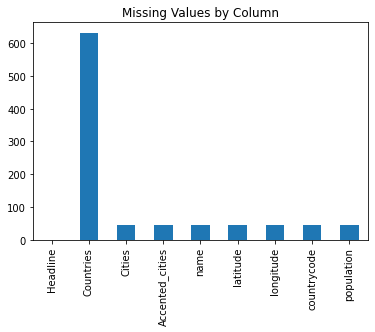

In [39]:
# CLEAN DATA

# check what kind of data is missing
_ = df.isna().sum().plot.bar(title='Missing Values by Column')

In [40]:
# drop countries column as it doesn't give us much info
df = df.drop(columns=['Countries'])

In [42]:
# check headlines which no city names
pd.options.display.max_colwidth = 100

# make a copy of df with no cities
no_names = df[df['name'].isna()].copy()

print('{} headlines without a city'.format(len(no_names)))
no_names.tail()

44 headlines without a city


,Headline,Cities,Accented_cities,name,latitude,longitude,countrycode,population
596,Zika arrives in Dangriga,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601,More Patients in Maynard are Getting Diagnosed with Syphilis,NaN,NaN,NaN,NaN,NaN,NaN,NaN
625,Zika case reported in Antioquia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
627,Chikungunya has not Left Pismo Beach,NaN,NaN,NaN,NaN,NaN,NaN,NaN
628,Zika spreads to La Joya,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# manually check against mapping
city_set = set(city_accent_mapping.keys())

for city in ['Dangriga', 'Maynard', 'Antioquia', 'Pismo Beach', 'La Joya']:
    if city in city_set:
        print('Found', city)
    else:
        print('Did not find')

Did not find
Did not find
Did not find
Did not find
Did not find


In [44]:
# remove these rows with no cities
df = df.dropna(subset=['name'])

In [48]:
print(len(df))

603


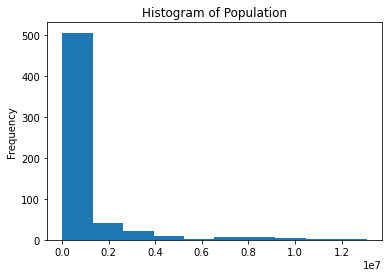

In [50]:
_ = df['population'].plot.hist(title='Histogram of Population')

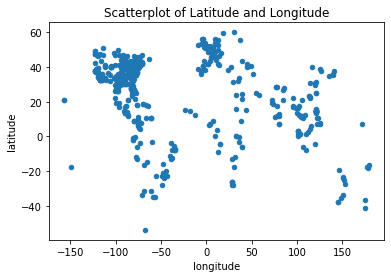

In [51]:
_ = df.plot.scatter(x='longitude', y='latitude', title='Scatterplot of Latitude and Longitude')

In [52]:
# remove name column
df = df.drop(columns=['name'])
df.head()

,Headline,Cities,Accented_cities,latitude,longitude,countrycode,population
0,Zika Outbreak Hits Miami,Miami,Miami,25.77427,-80.19366,US,441003.0
1,Could Zika Reach New York City?,New York City,New York City,40.71427,-74.00597,US,8175133.0
2,First Case of Zika in Miami Beach,Miami Beach,Miami Beach,25.79065,-80.13005,US,92312.0
3,"Mystery Virus Spreads in Recife, Brazil",Recife,Recife,-8.05389,-34.88111,BR,1478098.0
4,Dallas man comes down with case of Zika,Dallas,Dallas,32.78306,-96.80667,US,1300092.0


In [53]:
# save data
df.to_csv('processed_headline_locations.csv')